In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from flask import Flask, render_template, request
from sklearn.preprocessing import LabelEncoder


In [2]:
file_path = 'dataset.csv'  
df = pd.read_csv(file_path)

In [3]:
# Displays the first few rows of the DataFrame to understand the structure
print("Initial DataFrame:")
print(df.head())


Initial DataFrame:
   Unnamed: 0                track_id                 artists  \
0           0  5SuOikwiRyPMVoIQDJUgSV             Gen Hoshino   
1           1  4qPNDBW1i3p13qLCt0Ki3A            Ben Woodward   
2           2  1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN   
3           3  6lfxq3CG4xtTiEg7opyCyx            Kina Grannis   
4           4  5vjLSffimiIP26QG5WcN2K        Chord Overstreet   

                                          album_name  \
0                                             Comedy   
1                                   Ghost (Acoustic)   
2                                     To Begin Again   
3  Crazy Rich Asians (Original Motion Picture Sou...   
4                                            Hold On   

                   track_name  popularity  duration_ms  explicit  \
0                      Comedy          73       230666     False   
1            Ghost - Acoustic          55       149610     False   
2              To Begin Again          57       2

In [4]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Unnamed: 0          0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64


In [5]:
df = df.dropna()


In [6]:
print("\nData Statistics:")
print(df.describe())



Data Statistics:
          Unnamed: 0     popularity   duration_ms   danceability  \
count  113999.000000  113999.000000  1.139990e+05  113999.000000   
mean    56999.421925      33.238827  2.280312e+05       0.566801   
std     32909.243463      22.304959  1.072961e+05       0.173543   
min         0.000000       0.000000  8.586000e+03       0.000000   
25%     28499.500000      17.000000  1.740660e+05       0.456000   
50%     56999.000000      35.000000  2.129060e+05       0.580000   
75%     85499.500000      50.000000  2.615060e+05       0.695000   
max    113999.000000     100.000000  5.237295e+06       0.985000   

              energy            key       loudness           mode  \
count  113999.000000  113999.000000  113999.000000  113999.000000   
mean        0.641383       5.309126      -8.258950       0.637558   
std         0.251530       3.559999       5.029357       0.480708   
min         0.000000       0.000000     -49.531000       0.000000   
25%         0.472000    

In [7]:
print("\nData Info:")
print(df.info())



Data Info:
<class 'pandas.core.frame.DataFrame'>
Index: 113999 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        113999 non-null  int64  
 1   track_id          113999 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        113999 non-null  int64  
 6   duration_ms       113999 non-null  int64  
 7   explicit          113999 non-null  bool   
 8   danceability      113999 non-null  float64
 9   energy            113999 non-null  float64
 10  key               113999 non-null  int64  
 11  loudness          113999 non-null  float64
 12  mode              113999 non-null  int64  
 13  speechiness       113999 non-null  float64
 14  acousticness      113999 non-null  float64
 15  instrumentalness  113999 non-null  float64
 16  liveness     

In [8]:
features = df.drop('popularity', axis=1)  # Replace with your actual target variable column name
target = df['popularity']

In [9]:
print("\nDataFrame after Data Preprocessing:")
print(df.head())


DataFrame after Data Preprocessing:
   Unnamed: 0                track_id                 artists  \
0           0  5SuOikwiRyPMVoIQDJUgSV             Gen Hoshino   
1           1  4qPNDBW1i3p13qLCt0Ki3A            Ben Woodward   
2           2  1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN   
3           3  6lfxq3CG4xtTiEg7opyCyx            Kina Grannis   
4           4  5vjLSffimiIP26QG5WcN2K        Chord Overstreet   

                                          album_name  \
0                                             Comedy   
1                                   Ghost (Acoustic)   
2                                     To Begin Again   
3  Crazy Rich Asians (Original Motion Picture Sou...   
4                                            Hold On   

                   track_name  popularity  duration_ms  explicit  \
0                      Comedy          73       230666     False   
1            Ghost - Acoustic          55       149610     False   
2              To Begin Again  

In [10]:
del df['Unnamed: 0']

In [11]:
df['duration_sec'] = df['duration_ms'] / 1000

# Drop the original 'duration_ms' column if you no longer need it
df = df.drop('duration_ms', axis=1)

In [12]:
df['explicit'] = df['explicit'].astype(bool)


In [13]:
# Checking the 'popularity' column
popularity_constraints = (df['popularity'] < 0) | (df['popularity'] > 100)

# Identify rows that violate the constraints
rows_with_invalid_popularity = df[popularity_constraints]

# Display rows with invalid popularity values
print("Rows with invalid popularity values:")
print(rows_with_invalid_popularity)

Rows with invalid popularity values:
Empty DataFrame
Columns: [track_id, artists, album_name, track_name, popularity, explicit, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, time_signature, track_genre, duration_sec]
Index: []


In [14]:
#Normalizing/Scaling:

columns_to_scale = ['duration_sec', 'loudness', 'tempo']

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the scaler on the selected columns and transform the data
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

# Display the DataFrame after scaling
print("DataFrame after scaling:")
print(df.head())


DataFrame after scaling:
                 track_id                 artists  \
0  5SuOikwiRyPMVoIQDJUgSV             Gen Hoshino   
1  4qPNDBW1i3p13qLCt0Ki3A            Ben Woodward   
2  1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN   
3  6lfxq3CG4xtTiEg7opyCyx            Kina Grannis   
4  5vjLSffimiIP26QG5WcN2K        Chord Overstreet   

                                          album_name  \
0                                             Comedy   
1                                   Ghost (Acoustic)   
2                                     To Begin Again   
3  Crazy Rich Asians (Original Motion Picture Sou...   
4                                            Hold On   

                   track_name  popularity  explicit  danceability  energy  \
0                      Comedy          73     False         0.676  0.4610   
1            Ghost - Acoustic          55     False         0.420  0.1660   
2              To Begin Again          57     False         0.438  0.3590   
3  Can't He

In [15]:
print(df['track_id'])


0         5SuOikwiRyPMVoIQDJUgSV
1         4qPNDBW1i3p13qLCt0Ki3A
2         1iJBSr7s7jYXzM8EGcbK5b
3         6lfxq3CG4xtTiEg7opyCyx
4         5vjLSffimiIP26QG5WcN2K
                   ...          
113995    2C3TZjDRiAzdyViavDJ217
113996    1hIz5L4IB9hN3WRYPOCGPw
113997    6x8ZfSoqDjuNa5SVP5QjvX
113998    2e6sXL2bYv4bSz6VTdnfLs
113999    2hETkH7cOfqmz3LqZDHZf5
Name: track_id, Length: 113999, dtype: object


In [16]:
print(df.columns)


Index(['track_id', 'artists', 'album_name', 'track_name', 'popularity',
       'explicit', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'track_genre', 'duration_sec'],
      dtype='object')


In [17]:
print(df.head())

                 track_id                 artists  \
0  5SuOikwiRyPMVoIQDJUgSV             Gen Hoshino   
1  4qPNDBW1i3p13qLCt0Ki3A            Ben Woodward   
2  1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN   
3  6lfxq3CG4xtTiEg7opyCyx            Kina Grannis   
4  5vjLSffimiIP26QG5WcN2K        Chord Overstreet   

                                          album_name  \
0                                             Comedy   
1                                   Ghost (Acoustic)   
2                                     To Begin Again   
3  Crazy Rich Asians (Original Motion Picture Sou...   
4                                            Hold On   

                   track_name  popularity  explicit  danceability  energy  \
0                      Comedy          73     False         0.676  0.4610   
1            Ghost - Acoustic          55     False         0.420  0.1660   
2              To Begin Again          57     False         0.438  0.3590   
3  Can't Help Falling In Love       

In [18]:
df['track_name_artist_name'] = df['track_name'] + ' by ' + df['artists']
df = df.drop(['track_name', 'artists'], axis=1)

print(df.head())


                 track_id                                         album_name  \
0  5SuOikwiRyPMVoIQDJUgSV                                             Comedy   
1  4qPNDBW1i3p13qLCt0Ki3A                                   Ghost (Acoustic)   
2  1iJBSr7s7jYXzM8EGcbK5b                                     To Begin Again   
3  6lfxq3CG4xtTiEg7opyCyx  Crazy Rich Asians (Original Motion Picture Sou...   
4  5vjLSffimiIP26QG5WcN2K                                            Hold On   

   popularity  explicit  danceability  energy  key  loudness  mode  \
0          73     False         0.676  0.4610    1  0.300825     0   
1          55     False         0.420  0.1660    1 -1.784739     1   
2          57     False         0.438  0.3590    0 -0.293289     1   
3          71     False         0.266  0.0596    0 -2.039246     1   
4          82     False         0.618  0.4430    2 -0.282751     1   

   speechiness  acousticness  instrumentalness  liveness  valence     tempo  \
0       0.1430     

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from flask import Flask, render_template, request
from sklearn.preprocessing import LabelEncoder

file_path = 'dataset.csv'  
df = pd.read_csv(file_path)
df['track_name_artist_name'] = df['track_name'] + ' by ' + df['artists']
df = df.drop(['track_name', 'artists'], axis=1)

X = df[['danceability', 'energy', 'loudness', 'speechiness', 'instrumentalness', 'liveness', 'valence', 'tempo']]
y = df['track_name_artist_name']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (91200, 8)
X_test shape: (22800, 8)
y_train shape: (91200,)
y_test shape: (22800,)


X_train shape: (91200, 8) indicates that you have 91,200 samples in your training set, and each sample has 8 features.

X_test shape: (22800, 8) indicates that you have 22,800 samples in your testing set, and each sample also has 8 features.

y_train shape: (91200,) indicates that your training set has 91,200 corresponding target values.

y_test shape: (22800,) indicates that your testing set has 22,800 corresponding target values.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from flask import Flask, render_template, request
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report

file_path = 'dataset.csv'  
df = pd.read_csv(file_path)
df['track_name_artist_name'] = df['track_name'] + ' by ' + df['artists']
df = df.drop(['track_name', 'artists'], axis=1)

X = df[['danceability', 'energy', 'loudness', 'speechiness', 'instrumentalness', 'liveness', 'valence', 'tempo']]
y = df['track_name_artist_name']

# Assuming df is your DataFrame with features and target variable
# Encode categorical target variable
le = LabelEncoder()
df['track_name_artist_name_encoded'] = le.fit_transform(df['track_name_artist_name'])

# Data Preprocessing
X = df[['danceability', 'energy', 'loudness', 'speechiness', 'instrumentalness', 'liveness', 'valence', 'tempo']]
y = df['track_name_artist_name_encoded']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
predictions = model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 539518541.7691814
R-squared: 0.0032684647385156085


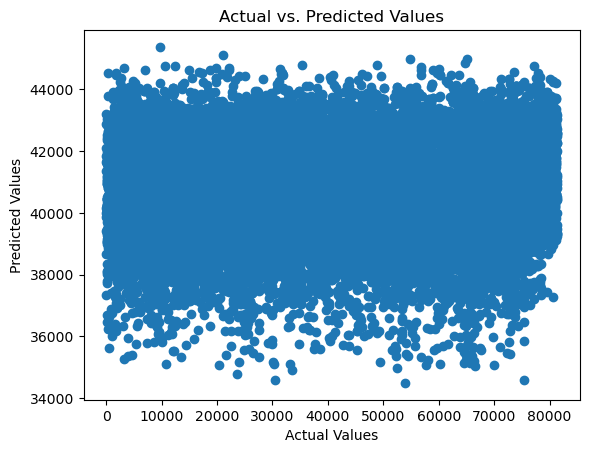

In [2]:
plt.scatter(y_test, predictions)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.show()

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import pandas as pd

file_path = 'dataset.csv'  
df = pd.read_csv(file_path)


X = df[['danceability', 'energy', 'loudness', 'speechiness', 'instrumentalness', 'liveness', 'valence', 'tempo']]
y = df['popularity'] 

# Assuming X and y are your feature matrix and target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

# Now you can make predictions and evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')



Mean Squared Error: 483.3007293742112
R-squared: 0.020629281092979124


In [18]:
df[['danceability', 'energy', 'loudness', 'speechiness', 'instrumentalness', 'liveness', 'valence', 'tempo']] = scaler.fit_transform(df[['danceability', 'energy', 'loudness', 'speechiness', 'instrumentalness', 'liveness', 'valence', 'tempo']])

# Predict popularity for the playlist using your trained model
X_playlist = df[['danceability', 'energy', 'loudness', 'speechiness', 'instrumentalness', 'liveness', 'valence', 'tempo']]
predicted_popularity = model.predict(X_playlist)

# Add predicted popularity to the DataFrame
df['predicted_popularity'] = predicted_popularity

# Rank songs based on predicted popularity
df_ranked = df.sort_values(by='predicted_popularity', ascending=False)

# Select top N songs for the playlist
top_n_songs = df_ranked.head(8)  # N is the number of songs you want in your playlist

# Print predicted popularity for each song
print("Predicted Popularity for the Playlist:")
print(top_n_songs[['track_name', 'artists', 'predicted_popularity']])

Predicted Popularity for the Playlist:
                                              track_name  \
3206                                         Sugar Daddy   
14428                         Once I Caught a Fish Alive   
33824  the remedy for a broken heart (why am I so in ...   
13196        Take It Easy - Sonny Fodera & Mat.Joe Remix   
18056                                          Dumplings   
13756        Take It Easy - Sonny Fodera & Mat.Joe Remix   
94608                                           Poseidon   
33868                                      Black Siemens   

                                    artists  predicted_popularity  
3206                            Qveen Herby             83.044398  
14428     Belle and the Nursery Rhymes Band             77.153081  
33824                          XXXTENTACION             75.515732  
13196  Gershon Jackson;Mat.Joe;Sonny Fodera             75.154496  
18056                              Pink Guy             75.083076  
13756  Gersh

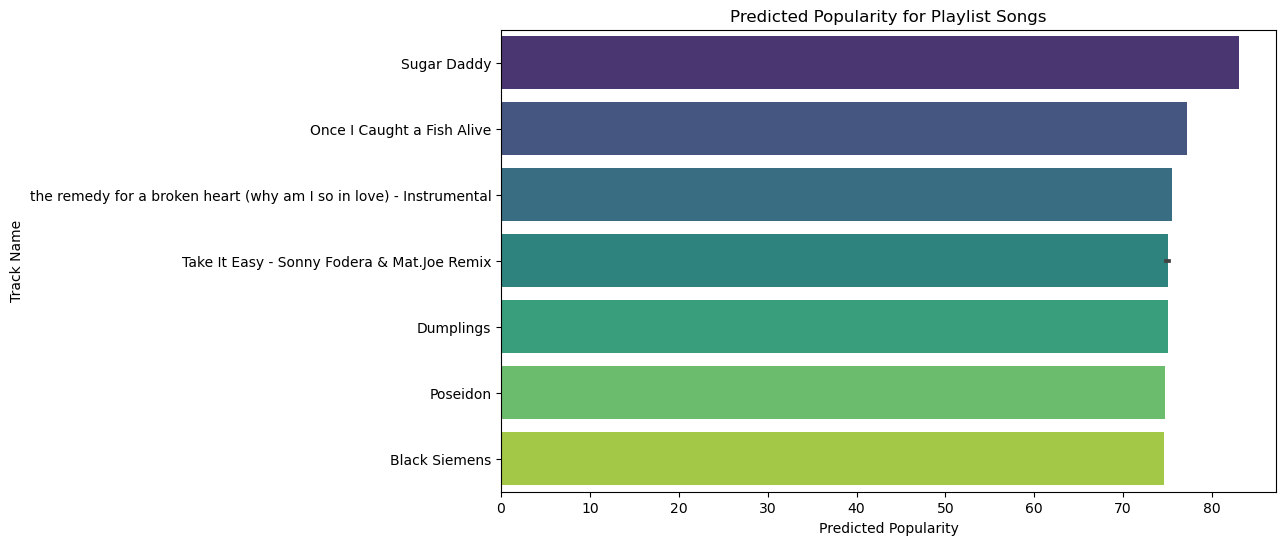

In [21]:
# Rank songs based on predicted popularity
df_ranked = df.sort_values(by='predicted_popularity', ascending=False)

# Select top N songs for the playlist
top_n_songs = df_ranked.head(8)  # N is the number of songs you want in your playlist

# Data visualization
plt.figure(figsize=(10, 6))
sns.barplot(x='predicted_popularity', y='track_name', data=top_n_songs, palette='viridis')
plt.title('Predicted Popularity for Playlist Songs')
plt.xlabel('Predicted Popularity')
plt.ylabel('Track Name')
plt.show()